# A Model to Predict PM2.5

## Intro

### Wait, What is PM2.5 ?

>Particulate matter 2.5 (PM2.5), refers to tiny particles or droplets in the air that are two and one half microns or less in width

In short, PM2.5 is the super tiny thing in the air and we consider it as pollutant. [More](https://www.epa.gov/pm-pollution) detail could be found on EPA as well as a series of standards.
<img src="./images/PM2.5.jpg" width="30%">

### Why We Interested in it ?

PM2.5 is so small that when you breath, you take it into your body. Scientific research shows that it might casue multiple diseases.
>[Fine Particles (PM 2.5) Questions and Answers](https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm)<br>
>Particles in the PM2.5 size range are able to travel deeply into the respiratory tract, reaching the lungs. Exposure to fine particles can cause short-term health effects. Scientific studies have linked increases in daily PM2.5 exposure with increased respiratory and cardiovascular hospital admissions, emergency department visits and deaths.

Environmental issues are one of the most prevalent topics nowadays in China, especially air pollution. In recent years, people have raised more concerned about it as they witnessed how it impacted on daily life.


### What We Want to do ?

Here, we aim at building a model that take some factors into consideration and predict the future concentration of  PM2.5. We would start with using the data of Beijing. Hopefully, we can use the model simulation to learn about how to control it,or at least, give people warning in advance.

### Any Related Work ?

Sure, there is a bunch of research about PM2.5, but mainly foucs on the relationship between PM2.5 and other factors without given a model describe it. We also notice that many prediction model of PM2.5 on the Internet just played the time-series data trick (the same mistake we made on stock market!).

#  Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Selected dataset:
# Shunyi(顺义)，Changping(昌平)，Huairou(怀柔)，Aotizhongxin(奥体)，(Tiantan)天坛

# first test with Shunyi data 
data = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv', index_col=['No'])
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi


In [3]:
# let's focus on PM2.5
data2 = data.drop(columns=['PM10', 'SO2', 'NO2', 'CO', 'O3', 'station'])
data2

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
No,,,,,,,,,,,
1,2013,3,1,0,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2,2013,3,1,1,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4
3,2013,3,1,2,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6
4,2013,3,1,3,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6
5,2013,3,1,4,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,10.3,1014.2,-12.4,0.0,W,1.8
35061,2017,2,28,20,47.0,9.8,1014.5,-9.9,0.0,NW,1.5
35062,2017,2,28,21,18.0,9.1,1014.6,-12.7,0.0,NE,1.7


In [4]:
# interpolate NA
data2['PM2.5'] = data2['PM2.5'].interpolate()
data3 = data2.copy()
data3

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
No,,,,,,,,,,,
1,2013,3,1,0,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2,2013,3,1,1,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4
3,2013,3,1,2,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6
4,2013,3,1,3,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6
5,2013,3,1,4,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,10.3,1014.2,-12.4,0.0,W,1.8
35061,2017,2,28,20,47.0,9.8,1014.5,-9.9,0.0,NW,1.5
35062,2017,2,28,21,18.0,9.1,1014.6,-12.7,0.0,NE,1.7


In [5]:
# validate there is no NA
data3[data3['PM2.5'].isnull() == True]

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
No,,,,,,,,,,,


In [6]:
# combine year month day hour together
def padding(x):
    """Padding function for month/day/hour (e.g. 1 -> 01)
    :param x:original month/day (single/double digit, int)
    :return string of month/day (double digit)
    """
    return str(x) if x >= 10 else '0' + str(x)

data3['date'] = data3.apply(lambda x: str(x.year)+'-'+padding(x.month)+'-'+padding(x.day)+' '+padding(x.hour)+':00:00', axis=1)
data3

,year,month,day,hour,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,date
No,,,,,,,,,,,,
1,2013,3,1,0,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3,2013-03-01 00:00:00
2,2013,3,1,1,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4,2013-03-01 01:00:00
3,2013,3,1,2,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6,2013-03-01 02:00:00
4,2013,3,1,3,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6,2013-03-01 03:00:00
5,2013,3,1,4,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,27.0,10.3,1014.2,-12.4,0.0,W,1.8,2017-02-28 19:00:00
35061,2017,2,28,20,47.0,9.8,1014.5,-9.9,0.0,NW,1.5,2017-02-28 20:00:00
35062,2017,2,28,21,18.0,9.1,1014.6,-12.7,0.0,NE,1.7,2017-02-28 21:00:00


In [7]:
# drop 'year', 'month', 'day', 'hour'
data4 = data3.drop(columns=['year', 'month', 'day', 'hour'])
data4

,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM,date
No,,,,,,,,
1,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3,2013-03-01 00:00:00
2,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4,2013-03-01 01:00:00
3,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6,2013-03-01 02:00:00
4,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6,2013-03-01 03:00:00
5,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...
35060,27.0,10.3,1014.2,-12.4,0.0,W,1.8,2017-02-28 19:00:00
35061,47.0,9.8,1014.5,-9.9,0.0,NW,1.5,2017-02-28 20:00:00
35062,18.0,9.1,1014.6,-12.7,0.0,NE,1.7,2017-02-28 21:00:00


In [8]:
# convert date string to datetime 
data4['date'] = pd.to_datetime(data4['date'])
data4.date

No
1       2013-03-01 00:00:00
2       2013-03-01 01:00:00
3       2013-03-01 02:00:00
4       2013-03-01 03:00:00
5       2013-03-01 04:00:00
                ...        
35060   2017-02-28 19:00:00
35061   2017-02-28 20:00:00
35062   2017-02-28 21:00:00
35063   2017-02-28 22:00:00
35064   2017-02-28 23:00:00
Name: date, Length: 35064, dtype: datetime64[ns]

In [9]:
# reset index
data4 = data4.set_index(["date"])
data4

,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,
2013-03-01 00:00:00,3.0,-0.9,1025.8,-20.5,0.0,NW,9.3
2013-03-01 01:00:00,12.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2013-03-01 02:00:00,14.0,-1.7,1026.2,-23.0,0.0,NW,8.6
2013-03-01 03:00:00,12.0,-2.1,1027.3,-23.3,0.0,NW,6.6
2013-03-01 04:00:00,12.0,-2.4,1027.7,-22.9,0.0,NW,4.5
...,...,...,...,...,...,...,...
2017-02-28 19:00:00,27.0,10.3,1014.2,-12.4,0.0,W,1.8
2017-02-28 20:00:00,47.0,9.8,1014.5,-9.9,0.0,NW,1.5
2017-02-28 21:00:00,18.0,9.1,1014.6,-12.7,0.0,NE,1.7


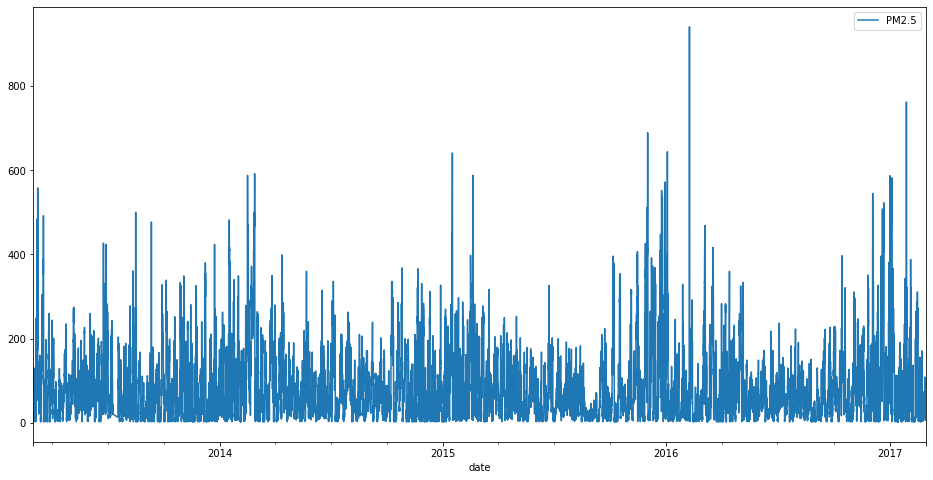

In [10]:
# see how pm2.5 change with time

data5 = data4.drop(['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], axis=1)
data5.plot(figsize=(16,8))

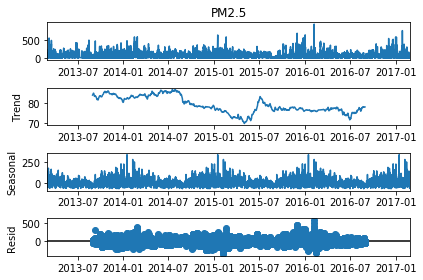

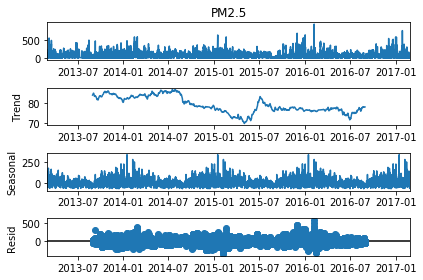

In [11]:
# seems like it has some seasonality?

from statsmodels.tsa.seasonal import seasonal_decompose
# period is 24*365 = 8760
decomposeResult = seasonal_decompose(data5['PM2.5'], period = 8760)
decomposeResult.plot()

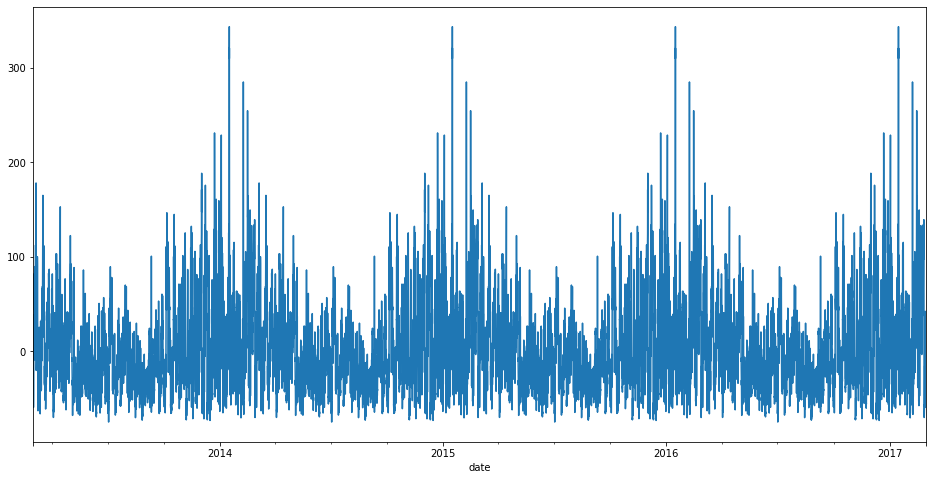

In [12]:
decomposeResult.seasonal.plot(figsize=(16,8))

In [13]:
# the PM2.5 is fluctuating during one year period
# seems like PM2.5 is higher in winter period, which is reasonable.(heating)

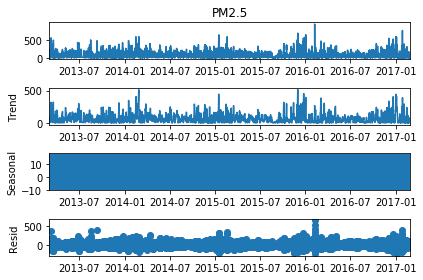

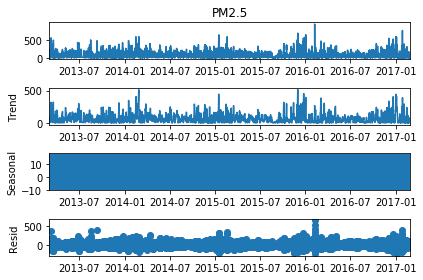

In [14]:
# if there is a daily pattern ?

decomposeResult_daily = seasonal_decompose(data5['PM2.5'], period = 24)
decomposeResult_daily.plot()

/Users/conan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/conan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/conan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


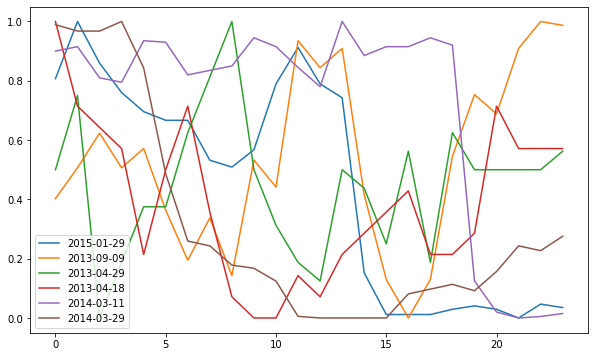

In [15]:
# seems like no seasonality?
# try to randomly pick up some daily data and normalize it, to see if they have some trend

from datetime import timedelta
from sklearn import preprocessing

day_lapse = np.random.randint(1, 1200, size=6) 
scaler = preprocessing.MinMaxScaler()


for lapse in day_lapse:
    # get random day
    date = data5.index[0] + timedelta(days=int(lapse))
    datestring = date.strftime('%Y-%m-%d')
    # selected data within this day
    df_daily = data5[data5.index.strftime('%Y-%m-%d') == datestring]
        # print(df_daily)
    # normalize data
    scaled = scaler.fit_transform(df_daily)
    df_daily['PM2.5'] = scaled
    df_daily.rename(columns={'PM2.5':datestring },inplace=True)
    df_daily.reset_index(inplace=True)
    df_daily.drop(columns=['date'], inplace=True)
        # print(df_daily)
    # plot data
    df_daily[datestring].plot(legend=True, figsize=(10,6))
    
    



/Users/conan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/conan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/conan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


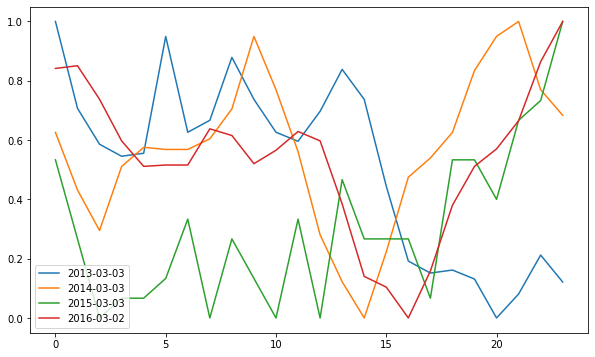

In [16]:
# it seems like there is no daily pattern??
# try same day on different year
from datetime import timedelta
from sklearn import preprocessing

year_lapse = [0, 1, 2, 3]
scaler = preprocessing.MinMaxScaler()


for lapse in year_lapse:
    # get random day
    date = data5.index[50] + timedelta(days=int(lapse * 365))
    datestring = date.strftime('%Y-%m-%d')
    # selected data within this day
    df_daily = data5[data5.index.strftime('%Y-%m-%d') == datestring]
        # print(df_daily)
    # normalize data
    scaled = scaler.fit_transform(df_daily)
    df_daily['PM2.5'] = scaled
    df_daily.rename(columns={'PM2.5':datestring },inplace=True)
    df_daily.reset_index(inplace=True)
    df_daily.drop(columns=['date'], inplace=True)
        # print(df_daily)
    # plot data
    df_daily[datestring].plot(legend=True, figsize=(10,6))


In [17]:
#show PM2.5 in five districts by using 3D chart 
from pyecharts import options as opts
from pyecharts.charts import Bar3D

shunyi_3d = pd.read_csv('data/cleanup/shunyi.csv')['PM2.5'][:24]
changping_3d = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')['PM2.5'][:24]
huairou_3d = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')['PM2.5'][:24]
dongcheng_3d = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')['PM2.5'][:24]
chaoyang_3d = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')['PM2.5'][:24]

def generate_bardata(dist_id, dist_data):
    bar_data = []
    for i in range(24):
        hours_data = []
        hours_data.append(dist_id)
        hours_data.append(i)
        hours_data.append(dist_data[i])
        bar_data.append(hours_data)
    return bar_data

In [18]:
districts = ['shunyi','huairou','changping','dongcheng','chaoyang']
pm_bar_shunyi = generate_bardata(0,shunyi_3d)
pm_bar_huairou = generate_bardata(1,huairou_3d)
pm_bar_changping = generate_bardata(2,changping_3d)
pm_bar_dongcheng = generate_bardata(3,dongcheng_3d)
pm_bar_chaoyang = generate_bardata(4,chaoyang_3d)

#show data for five districts
data_bar = pm_bar_shunyi+pm_bar_huairou+pm_bar_changping+pm_bar_dongcheng+pm_bar_chaoyang

In [19]:
hours = [
    "12a",
    "1a",
    "2a",
    "3a",
    "4a",
    "5a",
    "6a",
    "7a",
    "8a",
    "9a",
    "10a",
    "11a",
    "12p",
    "1p",
    "2p",
    "3p",
    "4p",
    "5p",
    "6p",
    "7p",
    "8p",
    "9p",
    "10p",
    "11p",
]

data_3d = [[d[1], d[0], d[2]] for d in data_bar]


(
    Bar3D(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add(
        series_name="",
        data=data_3d,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", data=hours),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", data=districts),
        zaxis3d_opts=opts.Axis3DOpts(type_="value"),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            max_=25,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
    .render_notebook()
)

In [20]:
df_temp = data4[data4.index.strftime('%Y-%m-%d') == '2015-03-03']
df_temp

,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,
2015-03-03 00:00:00,12.0,7.2,1012.9,-17.8,0.0,NW,3.8
2015-03-03 01:00:00,8.0,6.4,1013.6,-18.4,0.0,NW,3.6
2015-03-03 02:00:00,4.0,5.3,1014.8,-19.3,0.0,WNW,5.0
2015-03-03 03:00:00,5.0,4.0,1016.1,-21.2,0.0,NW,5.0
2015-03-03 04:00:00,5.0,3.3,1016.6,-25.5,0.0,NW,6.2
2015-03-03 05:00:00,6.0,2.2,1017.6,-27.5,0.0,NNW,4.5
2015-03-03 06:00:00,9.0,1.2,1018.7,-26.1,0.0,NW,6.3
2015-03-03 07:00:00,4.0,-1.0,1020.1,-26.0,0.0,WNW,8.2
2015-03-03 08:00:00,8.0,-2.0,1021.8,-24.5,0.0,WNW,7.0


In [21]:


# plot PM2.5 with different weather condition (normalize all columns)

data6 = data4.drop(columns=['wd'])
data6_n =((data6-data6.min())/(data6.max()-data6.min()))
data6_n

,PM2.5,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,
2013-03-01 00:00:00,0.001065,0.277003,0.689781,0.244094,0.0,0.726562
2013-03-01 01:00:00,0.010650,0.273519,0.695255,0.231496,0.0,0.734375
2013-03-01 02:00:00,0.012780,0.263066,0.697080,0.204724,0.0,0.671875
2013-03-01 03:00:00,0.010650,0.256098,0.717153,0.200000,0.0,0.515625
2013-03-01 04:00:00,0.010650,0.250871,0.724453,0.206299,0.0,0.351562
...,...,...,...,...,...,...
2017-02-28 19:00:00,0.026624,0.472125,0.478102,0.371654,0.0,0.140625
2017-02-28 20:00:00,0.047923,0.463415,0.483577,0.411024,0.0,0.117188
2017-02-28 21:00:00,0.017039,0.451220,0.485401,0.366929,0.0,0.132812


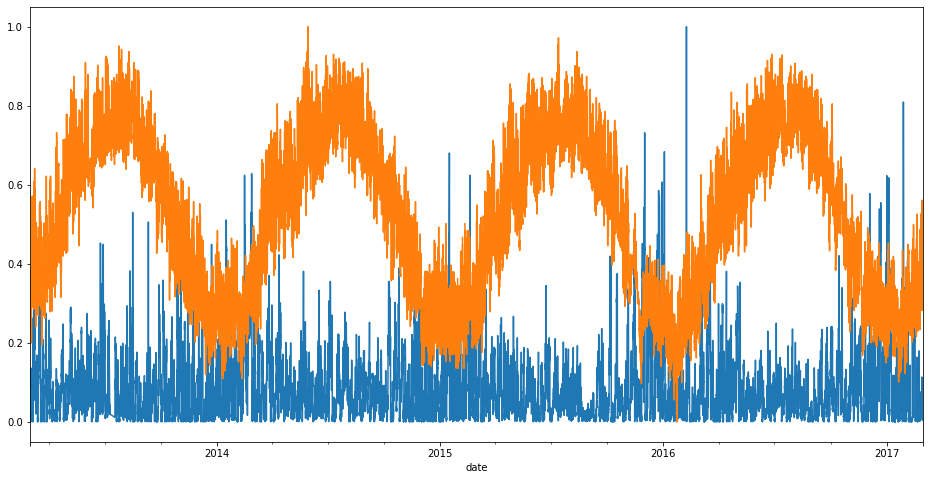

In [22]:
data6_n['PM2.5'].plot(figsize=(16,8))
data6_n['TEMP'].plot()

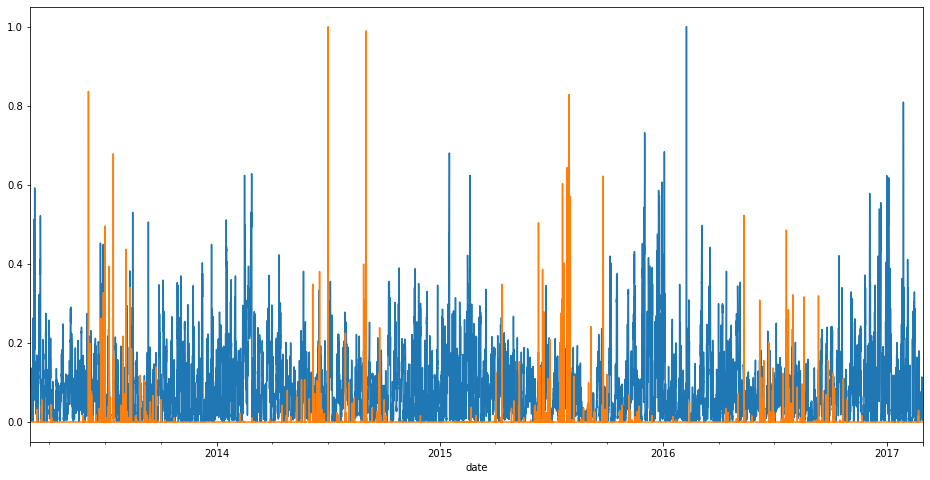

In [23]:
data6_n['PM2.5'].plot(figsize=(16,8))
data6_n['RAIN'].plot()

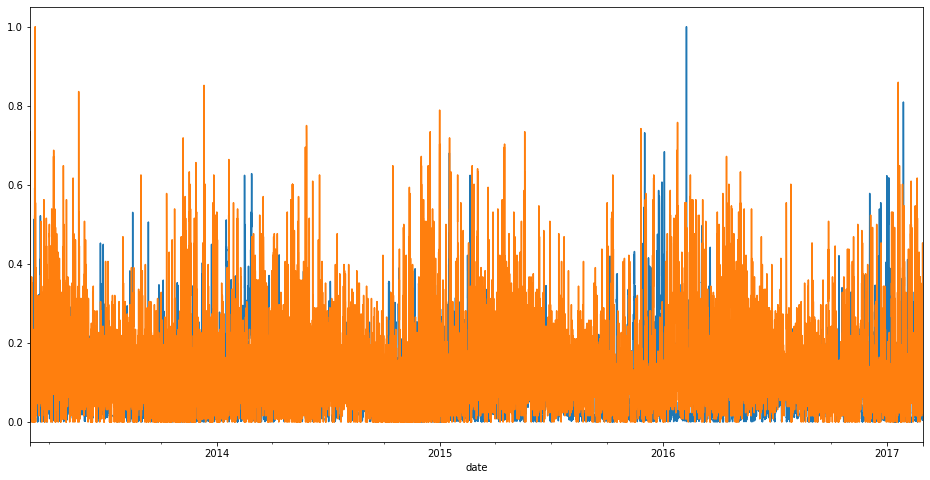

In [24]:
data6_n['PM2.5'].plot(figsize=(16,8))
data6_n['WSPM'].plot()

In [25]:
# let's see the relationship PM2.5 and particulates
data7 = data.copy()
data7['PM2.5'] = data7['PM2.5'].interpolate()
data7['date'] = data7.apply(lambda x: str(x.year)+'-'+padding(x.month)+'-'+padding(x.day)+' '+padding(x.hour)+':00:00', axis=1)
data7['date'] = pd.to_datetime(data7['date'])
data7 = data7.set_index(["date"])
data8 = data7.drop(columns=['year','month','day','hour','TEMP','PRES','DEWP','RAIN','wd','WSPM','station'])
data8_n =((data8-data8.min())/(data8.max()-data8.min()))
data8_n

,PM2.5,PM10,SO2,NO2,CO,O3
date,,,,,,
2013-03-01 00:00:00,0.001065,0.004012,0.011371,0.023438,0.020202,0.124568
2013-03-01 01:00:00,0.010650,0.010030,0.011371,0.019531,0.020202,0.133102
2013-03-01 02:00:00,0.012780,0.012036,NaN,0.019531,0.010101,0.061979
2013-03-01 03:00:00,0.010650,0.010030,0.011371,0.011719,NaN,NaN
2013-03-01 04:00:00,0.010650,0.010030,0.011371,NaN,0.010101,0.030685
...,...,...,...,...,...,...
2017-02-28 19:00:00,0.026624,0.070211,0.032316,0.351562,0.070707,0.044910
2017-02-28 20:00:00,0.047923,0.053159,0.070018,0.328125,0.101010,0.053444
2017-02-28 21:00:00,0.017039,0.026078,0.015560,0.109375,0.040404,0.181466


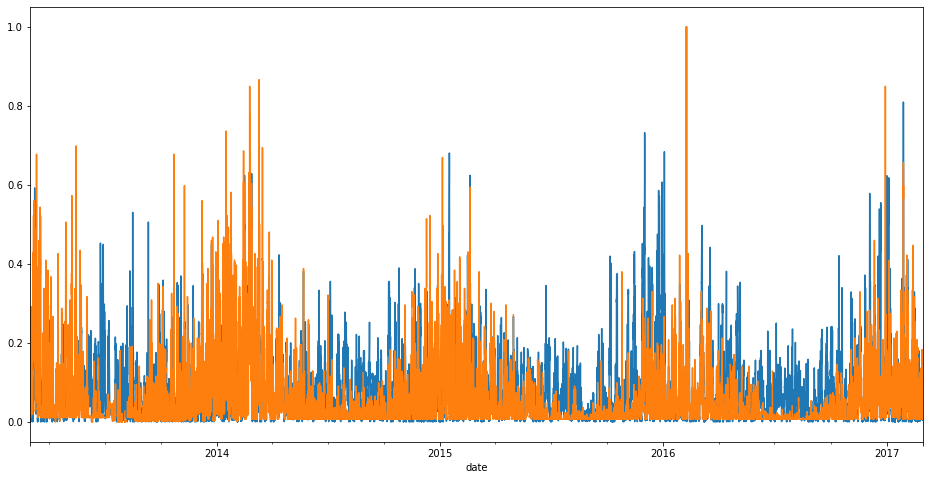

In [26]:
data8_n['PM2.5'].plot(figsize=(16,8))
data8_n['SO2'].plot()

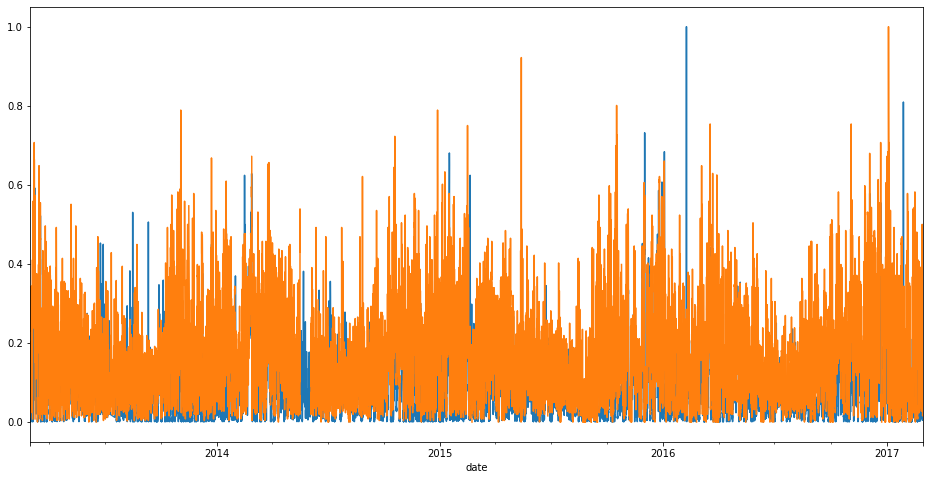

In [27]:
data8_n['PM2.5'].plot(figsize=(16,8))
data8_n['NO2'].plot()

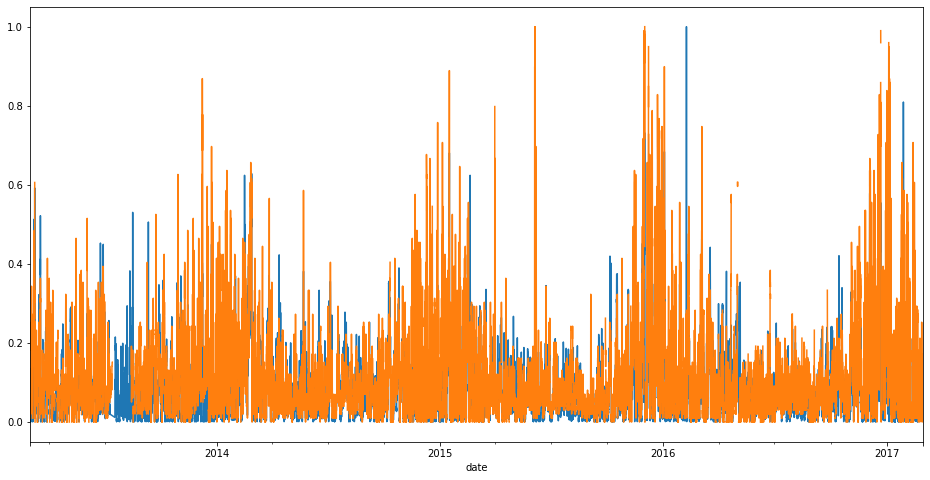

In [28]:
data8_n['PM2.5'].plot(figsize=(16,8))
data8_n['CO'].plot()

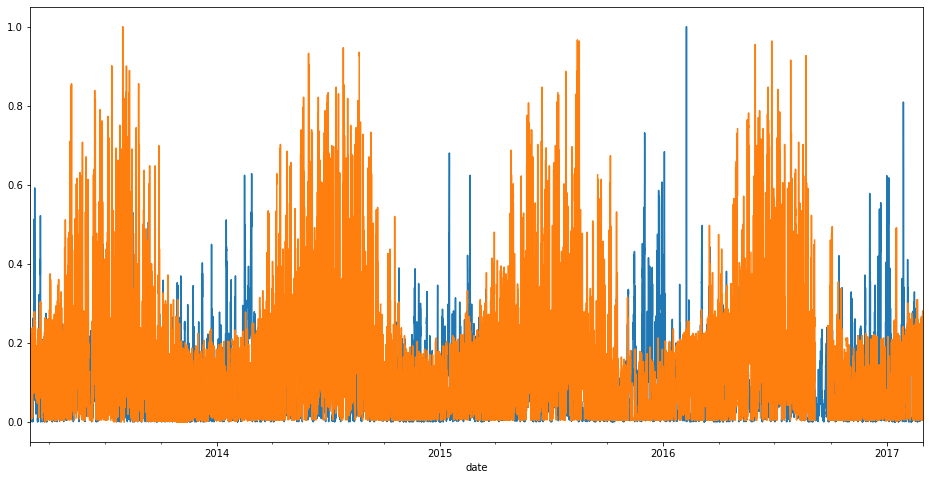

In [29]:
data8_n['PM2.5'].plot(figsize=(16,8))
data8_n['O3'].plot()